In [ ]:
'''
next() 는 두가지 포맷으로 사용된다.
function 구조로 사용되면 header 만 리턴한다.
consumer 구조로 사용되면 data에서 header 를 제거한다.

row[날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)] 최고기온은 -1 이다.

data : [] = list() 는 list 타입의 data 를 list() 로 초기화 시키는 것이다.
단, 한 메소드 내에서만 사용하면 로컬에서 초기화한다. 예제는 다음과 같다. 
data : [] = None
def save_highest_temperatures(self):
     data = list()
그러나, 여러 메소드에서 사용하면 필드에서 초기화한다. 예제는 다음과 같다. 
data : [] = list()
'''

In [57]:
import csv
import matplotlib.pyplot as plt
import random

In [29]:
data = csv.reader(open('data/seoul.csv', 'rt', encoding='UTF-8'))

In [30]:
 next(data)

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

In [31]:
ls = list(data)

In [51]:
print([i for i in ls])

In [52]:
print([i[-1] for i in ls]) # show_highest_temperature

In [36]:
highest_temperatures = []
[highest_temperatures.append(float(i[-1])) for i in ls if i[-1] != '']
print(f'총 {len(highest_temperatures)} 개')       

총 39463 개


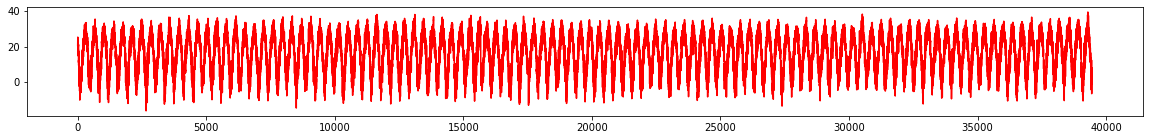

In [41]:
plt.figure(figsize=(20,2))
plt.plot(highest_temperatures, 'r') # red

In [42]:
high = [] # 최고기온
low = [] # 최저기온

In [44]:
for i in ls:
    if i[-1] != '' and i[-2] != '':
        if 1983 <= int(i[0].split('-')[0]):
            if i[0].split('-')[1]=='02' and i[0].split('-')[2] == '14':
                high.append(float(i[-1]))
                low.append(float(i[-2]))

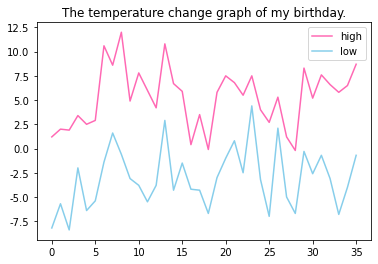

In [50]:
plt.rc('font')
plt.rcParams['axes.unicode_minus'] = False
plt.title('The temperature change graph of my birthday.')
plt.plot(high, 'hotpink', label='high')
plt.plot(low, 'skyblue', label='low')
plt.legend()

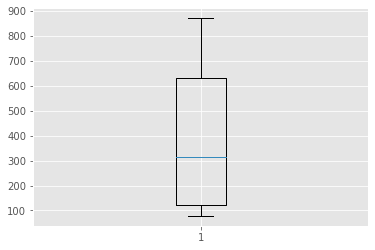

In [59]:
arr = []
[arr.append(random.randint(1, 1000))for i in range(13)]
plt.boxplot(arr)
plt.show()

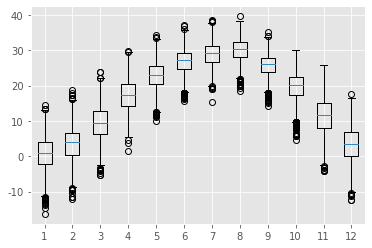

In [56]:
month = [[], [], [], [], [], [], [], [], [], [], [], []]
# for i in arr:
#     if i[-1] != '':
#         month[int(i[0].split('-')[1])-1].append(float(i[-1]))
[month[int(i[0].split('-')[1]) - 1].append(float(i[-1])) for i in ls if i[-1] != '']
plt.boxplot(month)
plt.show()

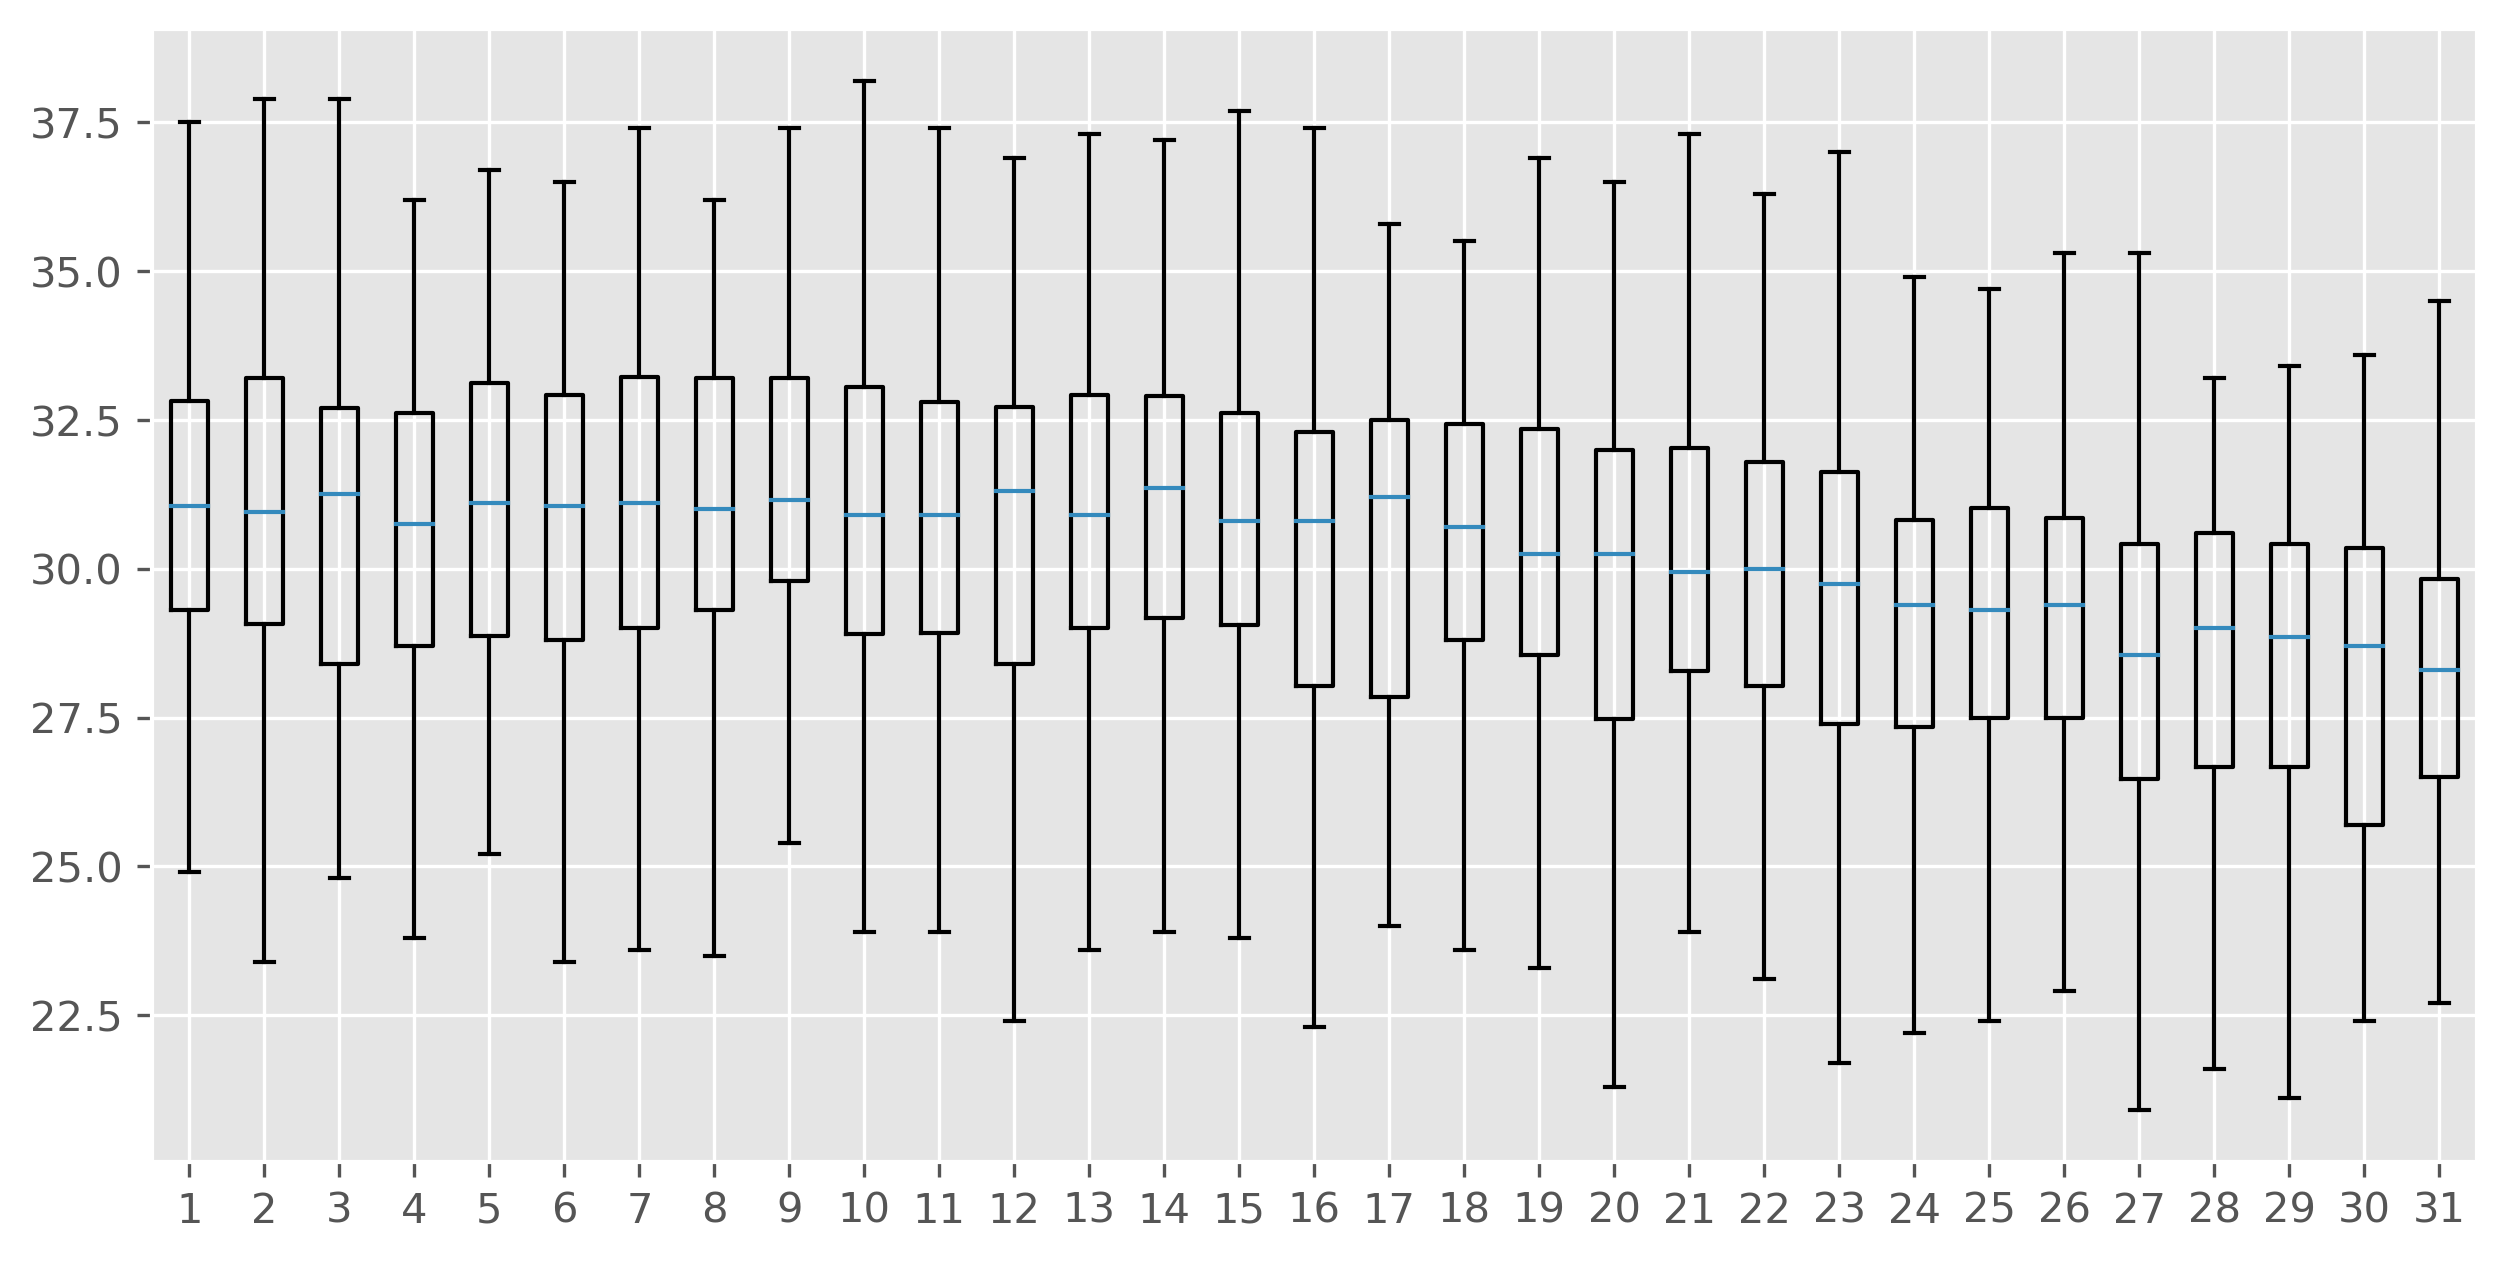

In [55]:
day = []
[day.append([]) for i in range(31)]
[day[int(i[0].split('-')[2]) -1].append(float(i[-1]))
     for i in ls
        if i[-1] != ''
            if i[0].split('-')[1] == '08']
plt.style.use('ggplot') # Graph Style
plt.figure(figsize=(10, 5), dpi=300) # Graph Size
plt.boxplot(day, showfliers=False) # Omit Outlier
plt.show()